In [59]:
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import dirname
import csv
import math

from scipy.stats import norm

# Import data from csv's 

In [60]:
datadir = os.getcwd()

suffix = ['1-20', '21-40', '41-60', '61-80', '81-100', '101-120', '121-140', '141-160', '161-180', '181-191']

#What we gave the ESA archive
datafile_input = []
for i in range(0 , len(suffix)):
    temp = '/SID_{0}_in.csv'.format(suffix[i])

    with open(datadir+temp, 'r') as f:
        reader = csv.reader(f)
        input_1_20 = list(reader)
    datafile_input.append(input_1_20)
    
#What we got from the ESA archive
datafile_output = []
for i in range(0 , len(suffix)):
    temp = '/SID_{0}_out.csv'.format(suffix[i])

    with open(datadir+temp, 'r') as f:
        reader = csv.reader(f)
        output_1_20 = list(reader)
    datafile_output.append(output_1_20)   

In [61]:
#extract gaia source IDs from the input files
input_ids = []

for j in range(0, len(datafile_input)):
    input_idss = []
    for i in range(0, len(datafile_input[j])):
        input_idss.append(int(datafile_input[j][i][0].split(" ")[2]))
    input_ids.append(input_idss)

In [4]:
#extract gaia source IDs from the output files

output_ids = []

for j in range(0, len(datafile_output)):
    temp = [int(datafile_output[j][i][0]) for i in range(1,len(datafile_output[j]))]
    output_ids.append(temp)

In [5]:
#check if every pair of files (resp. first input and first output file) contain same IDs

for i in range(0, len(output_ids)):
    print(set(output_ids[i]) == set(input_ids[i])) #we have to use set, because the output is not in the same order as the input

True
True
True
True
True
True
True
True
True
True


In [6]:
set(output_ids[1])-set(input_ids[1])

set()

In [160]:
# input which was wrong outputted
[
 337165794710535040,
]

[337165794710535040]

In [161]:
# wrong output
[
 337165966508978432,
]

[337165966508978432]

In [7]:
#now extract all data into lists
output_info = datafile_output[0][0]
output_info

['source_id',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'phot_g_mean_mag',
 'radial_velocity',
 'radial_velocity_error',
 'target_id',
 'target_ra',
 'target_dec',
 'target_parallax',
 'target_pm_ra',
 'target_pm_dec',
 'target_radial_velocity',
 'dist']

In [73]:
rv

array(['', '', '', '', '', '', '16.07079375797784', '-8.463086144243011',
       '', '-2.037735079575139', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '-8.44743261121378', '', '', '', '', '',
       '-3.0466135091630484', '', '-7.632652103149402', '', '', '', '',
       '', '', '', '', '', '', '-6.775649112057755', '', '', '',
       '-3.8355275158047917', '', '', '2.8993721715904623', '', '', '',
       '-6.849702181248542', '', '-48.33343377210595', '',
       '9.547993889840242', '', '-100.59889926451405', '', '', '', '', '',
       '', '2.8486514698935963', '-22.701868442658192', '', '', '', '',
       '', '', '-40.06296978345246', '', '-5.263572128685727', '', '', '',
       '', '-25.149324251484515', '', '', '', '', '', '', '', '',
       '-32.19554566515566', '', '', '', '', '', '', '', '', '', '',
       '-12.153871992040925', '', '', '', '', '', '-5.861064583705145',
       '', '', '', '', '', '', '', '', '7.274973739410365', '', '', '',
       '', '', '', '

In [8]:
#list that contains all data
output_all = []
for j in range(0, len(datafile_output)):
    #print(j)
    for i in range(0, len(datafile_output[j])-1):
        #print(i)
        temp = datafile_output[j][1:][i]
        output_all.append(temp)

In [9]:
len(output_all)

191

# Store data in arrays and exclude stars w/ no 5 parameter solutions

In [10]:
#every star normally has an id, ra&dec and a magnitude.

sid = np.array([int(output_all[i][0]) for i in range(0, len(output_all))])
ra = np.array([float(output_all[i][1]) for i in range(0, len(output_all))])
dec = np.array([float(output_all[i][3]) for i in range(0, len(output_all))])

#we can convert the magnitudes to fluxes
magg = np.array([float(output_all[i][11]) for i in range(0, len(output_all))])
fluxg = 10**(-0.4*np.array(magg))

In [11]:
lst = [513991075762254080
, 513601019709748864
, 513614767903945984
, 513611263210665344
, 513617482323290496
]

def where_id(sid, lst):
    ind = []
    for j in range(0, len(lst)):
        for i in range(0, len(sid)):
            if sid[i] == lst[j]:
                ind.append(i)
    return ind

In [13]:
remove = where_id(sid, lst)
where_id(sid, lst)

[44, 104, 155, 178, 186]

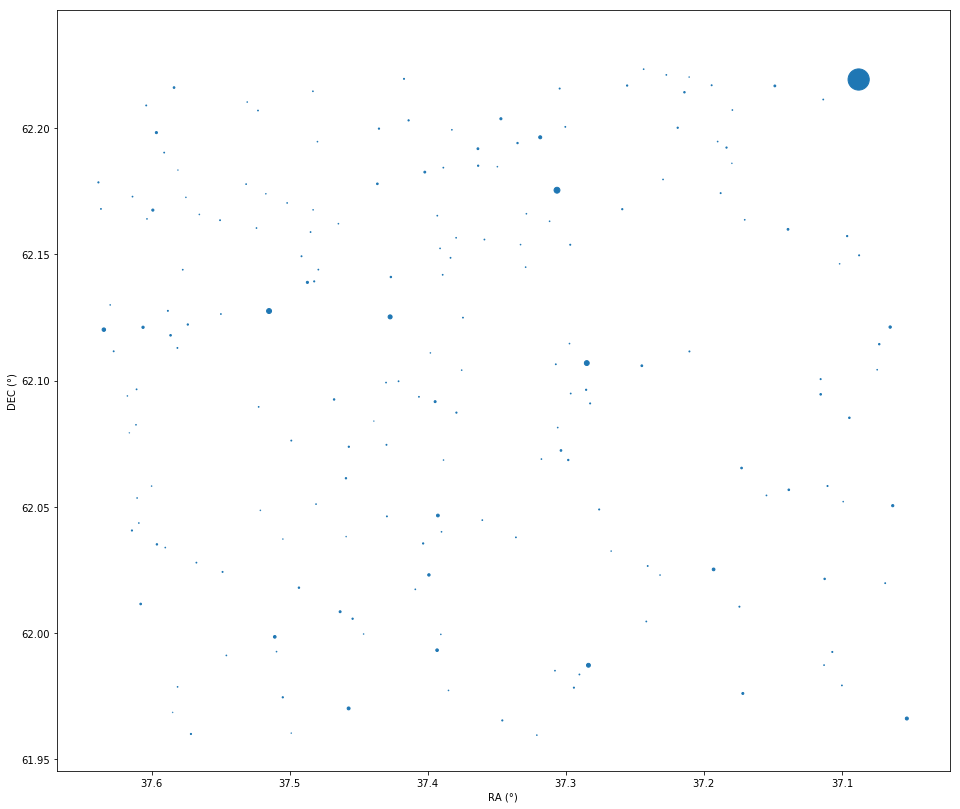

In [14]:
#using ra&dec and the flux we can recreate our observation
plt.subplots(1,1,figsize=(16,14))
plt.scatter(ra, dec, s=fluxg*5e5)

plt.gca().invert_xaxis()

plt.xlabel('RA (°)')
plt.ylabel('DEC (°)')

plt.show()

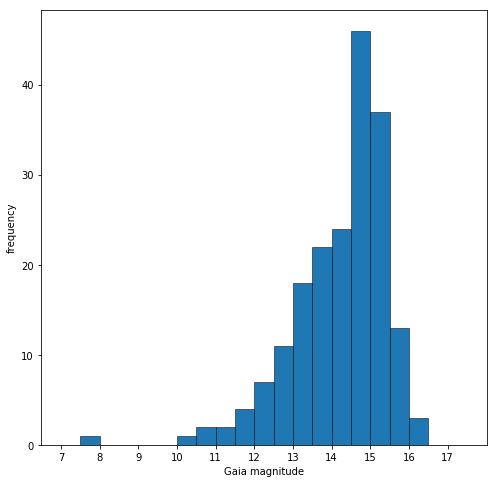

In [15]:
#a histogram of the magnitudes
fig, ax1 = plt.subplots(1, 1, figsize=(8,8))

ax1.hist(magg, bins=np.arange(7,18,0.5), edgecolor='black', linewidth=0.5)

ax1.set_xticks(np.arange(7,18,1))

ax1.set_xlabel('Gaia magnitude')
ax1.set_ylabel('frequency')

plt.show()

In [16]:
#because an (or some) element in the following lists is not a number we cant convert it yet into floats... 
pax = np.asarray([output_all[i][5] for i in range(0, len(output_all))])
pmra = np.asarray([output_all[i][7] for i in range(0, len(output_all))])
pmdec = np.asarray([output_all[i][9] for i in range(0, len(output_all))])

In [17]:
#Look for missing values
for j in range(0, len(output_all[0])):
        for i in range(0, len(output_all)):
            if output_all[i][j] == '':
                print(output_info[j],i)

parallax 89
parallax 104
parallax 180
parallax_error 89
parallax_error 104
parallax_error 180
pmra 89
pmra 104
pmra 180
pmra_error 89
pmra_error 104
pmra_error 180
pmdec 89
pmdec 104
pmdec 180
pmdec_error 89
pmdec_error 104
pmdec_error 180
radial_velocity 1
radial_velocity 3
radial_velocity 4
radial_velocity 5
radial_velocity 6
radial_velocity 7
radial_velocity 8
radial_velocity 10
radial_velocity 11
radial_velocity 13
radial_velocity 14
radial_velocity 15
radial_velocity 16
radial_velocity 17
radial_velocity 18
radial_velocity 19
radial_velocity 20
radial_velocity 21
radial_velocity 22
radial_velocity 23
radial_velocity 25
radial_velocity 27
radial_velocity 29
radial_velocity 30
radial_velocity 31
radial_velocity 32
radial_velocity 33
radial_velocity 34
radial_velocity 35
radial_velocity 36
radial_velocity 37
radial_velocity 38
radial_velocity 39
radial_velocity 40
radial_velocity 41
radial_velocity 42
radial_velocity 43
radial_velocity 44
radial_velocity 45
radial_velocity 46
radial_

In [18]:
#Where is/are the star/s with only a 2 parameter solution?
remove = where_id(sid, lst)

two_para_star = []

for i in range(0, len(pax)):
    if pax[i] == '':
        print(i) 
        two_para_star.append(i)
    if pmra[i] == '':
        print(i)
        two_para_star.append(i)
    if pmdec[i] == '':
        print(i)
        two_para_star.append(i)
        
        
two_para = list(set(two_para_star))
list(set(two_para_star))

# star 133 resp. element 132 has no pax, pmra & pmdec!
# so the star will be removed from all lists

89
89
89
104
104
104
180
180
180


[104, 89, 180]

In [19]:
remove

[44, 104, 155, 178, 186]

In [20]:
def is_float(string):
    try:
        float(string)
        return True
    except ValueError:
        return False
    
neg = []
for i in range(0, len(pax)):
    if is_float(pax[i]):
        if float(pax[i])<0:
            neg.append(i)
            
neg

[]

In [21]:
two_para_star = remove + two_para + neg
two_para_star

[44, 104, 155, 178, 186, 104, 89, 180]

In [25]:
rv = np.asarray([output_all[i][12] for i in range(0, len(output_all))])

rv_0 = []

for i in range(0, len(rv)):
    if rv[i] == "":
        rv_0.append(0)
    else:
        rv_0.append(float(rv[i]))

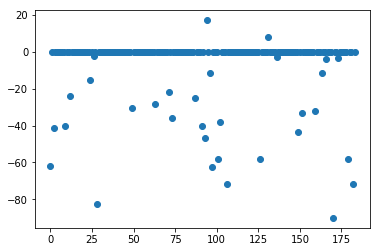

In [26]:
#plot rv values
#positive --> receding (visa versa)
plt.scatter(np.arange(0,len(rv_0_new)), rv_0_new)
plt.show()
#so most stars - with rv values - are moving towards us

In [57]:
len(pax_new)

184

In [27]:
#remove element 132:

sid_new = np.delete(sid, two_para_star)
ra_new = np.delete(ra, two_para_star)
dec_new = np.delete(dec, two_para_star)

magg_new = np.delete(magg, two_para_star)
fluxg_new = np.delete(fluxg, two_para_star)

rv_0_new = np.delete(rv_0, two_para_star)

pax_new = np.delete(pax, two_para_star).astype(float)
pmra_new = np.delete(pmra, two_para_star).astype(float)
pmdec_new = np.delete(pmdec, two_para_star).astype(float)

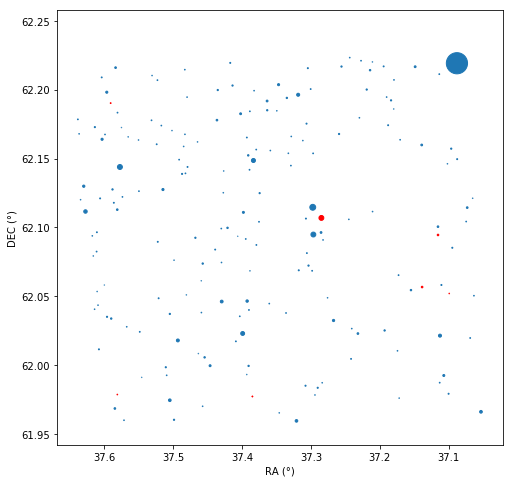

In [28]:
#using ra&dec and the flux we can recreate our observation
plt.subplots(1,1,figsize=(8,8))
plt.scatter(ra_new, dec_new, s=fluxg*5e5)
plt.scatter(ra[two_para_star], dec[two_para_star], s=fluxg[two_para_star]*5e5, c='r')

plt.gca().invert_xaxis()

plt.xlabel('RA (°)')
plt.ylabel('DEC (°)')

plt.show()

# Reconstruct our Observation

In [29]:
def arrows(x, y, pm_x, pm_y, scale):
    temp = []
    for i in range(0, len(x)):
        temp2 = [x[i], y[i], scale * pm_x[i], scale * pm_y[i]]
        temp.append(temp2)
    return np.array(temp)

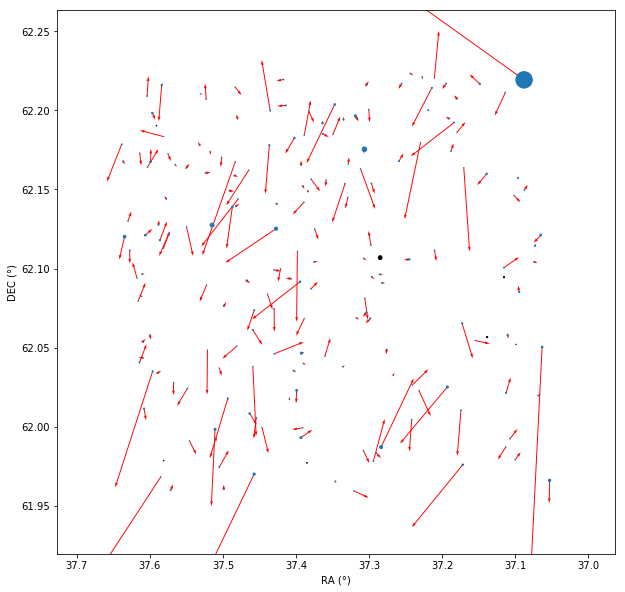

In [30]:
soa = arrows(ra_new, dec_new, pmra_new*np.cos(dec_new), pmdec_new, 0.005)


X, Y, U, V = zip(*soa)
plt.subplots(1,1,figsize=(10,10))
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, width=0.0017, alpha=1, color='r')


ax.scatter(ra[two_para_star], dec[two_para_star], s=np.array(fluxg[two_para_star])*3e5, c='k')
ax.scatter(ra_new, dec_new, s=np.array(fluxg_new)*3e5)

ax.invert_xaxis()

ax.margins(0.15) 

ax.set_xlabel('RA (°)')
ax.set_ylabel('DEC (°)')

#plt.savefig('M34_pm.png', dpi=1000)

plt.draw()
plt.show()

In [31]:
#0-->min and 1-->max
def get_index_max(array, min_or_max):
    if min_or_max == 0:
        tmp = min(array)
        tmpi = list(array).index(tmp)
        name = "Gaia DR2 %i" % sid_new[tmpi]
        return tmp, name
    elif min_or_max == 1:
        tmp = max(array)
        tmpi = list(array).index(tmp)
        name = "Gaia DR2 %i" % sid_new[tmpi]
        return tmp, name
    else:
        print('Read the instructions.... dummy')

In [32]:
get_index_max(pax_new, 1)

(16.650070803297115, 'Gaia DR2 513619234669893120')

In [33]:
# convert parallaxes into parsecs
parcs = 1000./np.array(pax_new)

In [34]:
pmra_new_c = pmra_new * np.cos(dec_new)

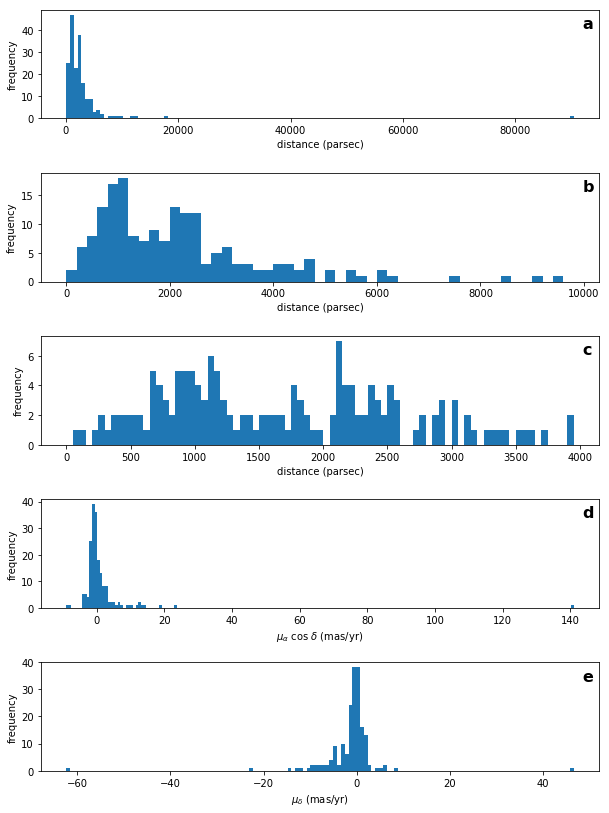

In [35]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10,14))

ax1.hist(parcs, bins='auto')
ax2.hist(parcs, bins=np.arange(0,10000,200))
ax3.hist(parcs, bins=np.arange(0,4000,50))
ax4.hist(pmra_new_c, bins='auto')
ax5.hist(pmdec_new, bins='auto')

#ax1.set_title('distance')
#ax2.set_title('distance zoom')
#ax3.set_title('pm ra')
#ax4.set_title('pm dec')

ax1.set_xlabel('distance (parsec)')
ax2.set_xlabel('distance (parsec)')
ax3.set_xlabel('distance (parsec)')
ax4.set_xlabel('$\mu_\\alpha$ cos $\delta$ (mas/yr)')
ax5.set_xlabel('$\mu_\\delta$ (mas/yr)')

ax1.set_ylabel('frequency')
ax2.set_ylabel('frequency')
ax3.set_ylabel('frequency')
ax4.set_ylabel('frequency')
ax5.set_ylabel('frequency')


posx = 0.97
posy = 0.83

ax1.text(posx, posy, 'a', transform=ax1.transAxes, fontsize=16, fontweight='bold')
ax2.text(posx, posy, 'b', transform=ax2.transAxes, fontsize=16, fontweight='bold')
ax3.text(posx, posy, 'c', transform=ax3.transAxes, fontsize=16, fontweight='bold')
ax4.text(posx, posy, 'd', transform=ax4.transAxes, fontsize=16, fontweight='bold')
ax5.text(posx, posy, 'e', transform=ax5.transAxes, fontsize=16, fontweight='bold')



plt.subplots_adjust(hspace=0.5)

#fig.savefig('M34_histogram.png')

plt.show()

# Clipping

In [65]:
from astropy.stats import sigma_clip
def clip_mask(array, sigma_num, iters_num):
    clip = sigma_clip(array, sigma=sigma_num, cenfunc=np.median, maxiters=iters_num)
    mask = [~clip.mask]
    return mask[0]

In [66]:
def clipping(array1, array2, array3, sigma_num, iters_num_small, iters_num_big):
    
    arrays = []
    
    arrays.append(array1)
    arrays.append(array2)
    arrays.append(array3)
    

    for i in range(0, iters_num_big):
        bool_clip1 = clip_mask(arrays[3*i+0], sigma_num, iters_num_small)
        bool_clip2 = clip_mask(arrays[3*i+1], sigma_num, iters_num_small)
        bool_clip3 = clip_mask(arrays[3*i+2], sigma_num, iters_num_small)
        bool_comb = bool_clip1 & bool_clip2 & bool_clip3
        array1_new = arrays[3*i+0][bool_comb]
        array2_new = arrays[3*i+1][bool_comb]
        array3_new = arrays[3*i+2][bool_comb]
        arrays.append(array1_new)
        arrays.append(array2_new)
        arrays.append(array3_new)
        len1_curr = len(arrays[3*i+0])
        len2_curr = len(arrays[3*i+1])
        len3_curr = len(arrays[3*i+2])
        len1_prev = len(arrays[3*(i-1)+0])
        len2_prev = len(arrays[3*(i-1)+1])
        len3_prev = len(arrays[3*(i-1)+2])
        
        if len1_curr==len1_prev:
            break   
        
    return arrays

In [67]:
lsts_clipped = clipping(parcs, pmra_new_c, pmdec_new, 3, 1, 200)

In [68]:
len(lsts_clipped)/3

10.0

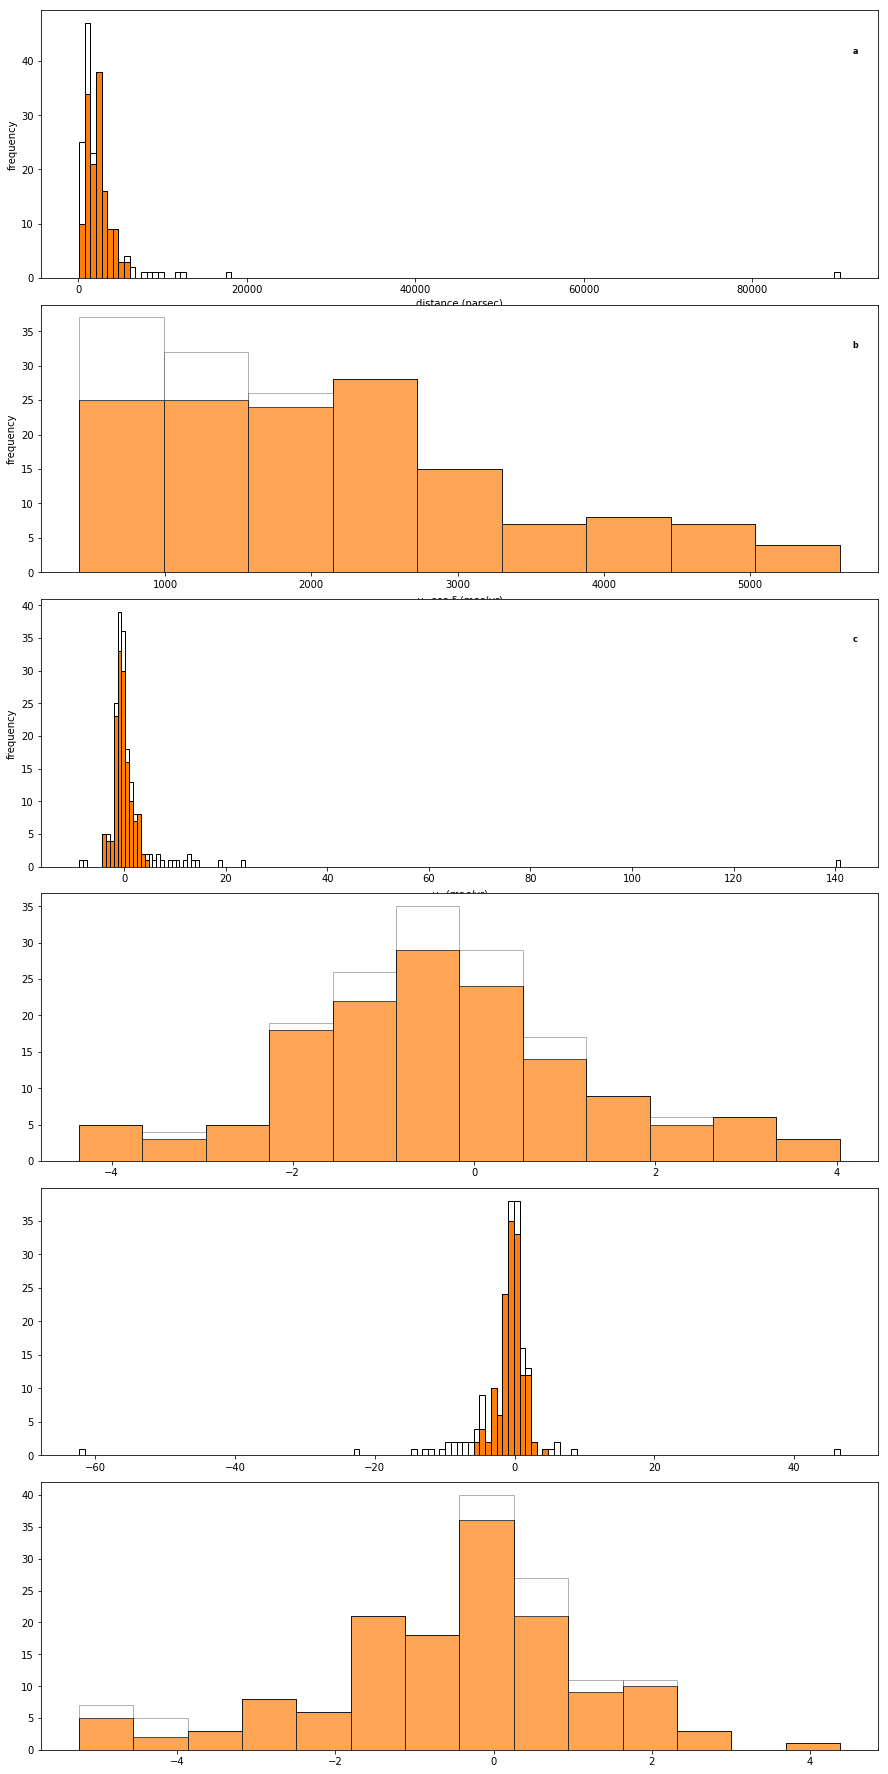

In [70]:
fig, (ax1, ax2,  ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize=(15,32))


_,bins, __ = ax1.hist(parcs, bins='auto', facecolor='w', edgecolor = 'k')
ax1.hist(lsts_clipped[-3], bins=bins, facecolor='C1', edgecolor = 'k')

_,bins, __ = ax2.hist(lsts_clipped[-3], bins='auto', facecolor='C1', edgecolor = 'k')
ax2.hist(parcs, bins=bins, facecolor='w', edgecolor = 'k',alpha=0.3)


_,bins, __ = ax3.hist(pmra_new_c, bins='auto', facecolor='w', edgecolor = 'k')
ax3.hist(lsts_clipped[-2], bins=bins, facecolor='C1', edgecolor = 'k')

_,bins, __ = ax4.hist(lsts_clipped[-2], bins='auto', facecolor='C1', edgecolor = 'k')
ax4.hist(pmra_new_c, bins=bins, facecolor='w', edgecolor = 'k',alpha=0.3)



_,bins, __ = ax5.hist(pmdec_new, bins='auto', facecolor='w', edgecolor = 'k')
ax5.hist(lsts_clipped[-1], bins=bins, facecolor='C1', edgecolor = 'k')

_,bins, __ = ax6.hist(lsts_clipped[-1], bins='auto', facecolor='C1', edgecolor = 'k')
ax6.hist(pmdec_new, bins=bins, facecolor='w', edgecolor = 'k',alpha=0.3)



#ax1.set_title('distance')
#ax2.set_title('distance zoom')
#ax3.set_title('pm ra')
#ax4.set_title('pm dec')


ax1.set_xlabel('distance (parsec)')
ax2.set_xlabel('$\mu_\\alpha$ cos $\delta$ (mas/yr)')
ax3.set_xlabel('$\mu_\\delta$ (mas/yr)')

ax1.set_ylabel('frequency')
ax2.set_ylabel('frequency')
ax3.set_ylabel('frequency')



posx = 0.97
posy = 0.84

ax1.text(posx, posy, 'a', transform=ax1.transAxes, fontsize=8, fontweight='bold')
ax2.text(posx, posy, 'b', transform=ax2.transAxes, fontsize=8, fontweight='bold')
ax3.text(posx, posy, 'c', transform=ax3.transAxes, fontsize=8, fontweight='bold')




plt.subplots_adjust(hspace=0.1)

fig.savefig('Teutsch55_histogram_test.pdf')

plt.show()

# Extract Cluster Members

In [36]:
mask_dist = []
mask_pmra = []
mask_pmdec = []

for i in range(len(parcs)):
    mask_dist.append(0 <= parcs[i] <= 6000)
    
for j in range(len(pmra_new_c)):
    mask_pmra.append(-10 <= pmra_new_c[j] <= 10)
    
for k in range(len(pmdec_new)):
    mask_pmdec.append(-10 <= pmdec_new[k] <= 5)
    
mask_dist = np.array(mask_dist)
mask_pmra = np.array(mask_pmra)
mask_pmdec = np.array(mask_pmdec)

mask_cluster = []

for ind in range(max(len(mask_dist),len(mask_pmra),len(mask_pmdec))):
    if mask_dist[ind] and mask_pmra[ind] and mask_pmdec[ind]:
        mask_cluster.append(True) 
    else:
        mask_cluster.append(False)
        
mask_cluster = np.array(mask_cluster)

In [37]:
mask_cluster

array([False,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,

In [38]:
ra_cl = ra_new[mask_cluster]
dec_cl = dec_new[mask_cluster]

pmra_new_c_cl = pmra_new_c[mask_cluster]
pmdec_new_cl = pmdec_new[mask_cluster]
parcs_cl = parcs[mask_cluster]

fluxg_cl = fluxg_new[mask_cluster]

In [39]:
mask_cluster_not = ~(mask_cluster)

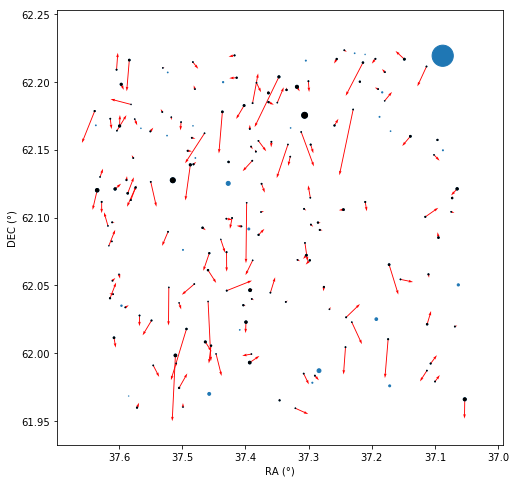

In [40]:
soa = arrows(ra_cl, dec_cl, pmra_new_c_cl, pmdec_new_cl, 0.005)

X, Y, U, V = zip(*soa)
plt.subplots(1,1,figsize=(8,8))
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, width=0.002, alpha=1, color='r')
ax.scatter(ra_new, dec_new, s=np.array(fluxg_new)*5e5)
ax.scatter(ra_cl, dec_cl, s=np.array(fluxg_cl)*5e5,c='k')

ax.invert_xaxis()

ax.margins(0.1) 

ax.set_xlabel('RA (°)')
ax.set_ylabel('DEC (°)')

#plt.savefig('M34_pm_mask.png', dpi=1000)

plt.draw()
plt.show()

In [41]:
pax

array(['16.650070803297115', '0.5604482340803969', '0.5638482370513794',
       '0.2472426607322835', '1.3781455638096358', '0.8226389887865191',
       '3.9491675596363622', '0.110303911564383', '0.38519873733978865',
       '0.19708750684099452', '0.45277293526961315', '1.4299676394870948',
       '1.1375611272802575', '0.7901154004920019', '0.011062142802277193',
       '1.26282192461592', '1.2747920401107649', '0.4017475960798568',
       '0.10420269367992334', '0.8421052967345324', '2.4417038199803827',
       '0.4765626516516854', '0.08443430291980539', '0.933871276088717',
       '0.23199159361436034', '0.4592195394559038', '2.127453456677739',
       '0.4464942353563346', '0.31272587510974903', '0.3976304326473471',
       '0.642084093168559', '1.1601877598920058', '1.1104615369611',
       '0.936264480856408', '1.6338079340538265', '0.551083007109126',
       '0.31804947483244744', '0.199854569096885', '0.3874735129633252',
       '0.15701051759055504', '0.47028991615269145', 

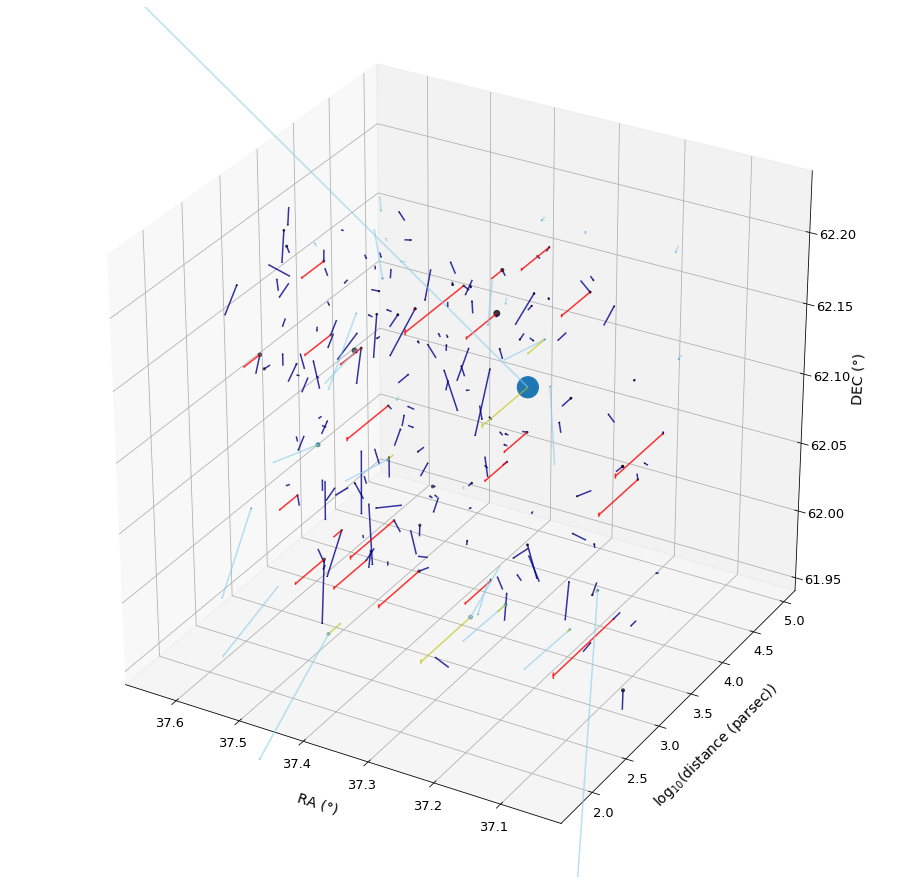

In [42]:
arrow_members = arrows(ra_new[mask_cluster], dec_new[mask_cluster], pmra_new_c[mask_cluster], pmdec_new[mask_cluster], 0.005)
arrow_nomembers = arrows(ra_new[mask_cluster_not], dec_new[mask_cluster_not], pmra_new_c[mask_cluster_not], pmdec_new[mask_cluster_not], 0.005)

X, Y, U, V = zip(*arrow_members)
Xno, Yno, Uno, Vno = zip(*arrow_nomembers)

d10 = list(map(math.log10, parcs[mask_cluster]))
d10no = list(map(math.log10, parcs[mask_cluster_not]))

from mpl_toolkits.mplot3d import Axes3D
import random


fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(ra_new[mask_cluster_not], d10no , dec_new[mask_cluster_not], s = np.array(fluxg_new[mask_cluster_not])*5e5)
ax.scatter(ra_new[mask_cluster], d10, dec_new[mask_cluster], s = np.array(fluxg_new[mask_cluster])*5e5, c='k')


ax.set_xlabel('RA (°)', labelpad=15, fontsize=14)
ax.set_ylabel('log$_{10}$(distance (parsec))', labelpad=15, fontsize=14)
ax.set_zlabel('DEC (°)', labelpad=17, fontsize=14)

ax.xaxis.set_tick_params(labelsize=13)
ax.yaxis.set_tick_params(labelsize=13)
ax.zaxis.set_tick_params(labelsize=13)

ax.quiver(Xno, d10no, Yno, Uno, 0, Vno, alpha=0.6, color='skyblue', arrow_length_ratio = 0.01)
ax.quiver(X, d10, Y, U, 0, V, alpha=0.8, color='darkblue', arrow_length_ratio = 0.01)
ax.quiver(Xno, d10no, Yno, 0, rv_0_new[mask_cluster_not]*0.01, 0, alpha=0.6, color='y', arrow_length_ratio = 0.01)
ax.quiver(X, d10, Y, 0, rv_0_new[mask_cluster]*0.01, 0, alpha=0.8, color='red', arrow_length_ratio = 0.01)

#ax.tick_params(axis='x', which='major', pad=10)
#ax.tick_params(axis='y', which='major', pad=10)
ax.tick_params(axis='z', which='major', pad=11)


ax.view_init(30, -60)
ax.invert_xaxis()

plt.show()

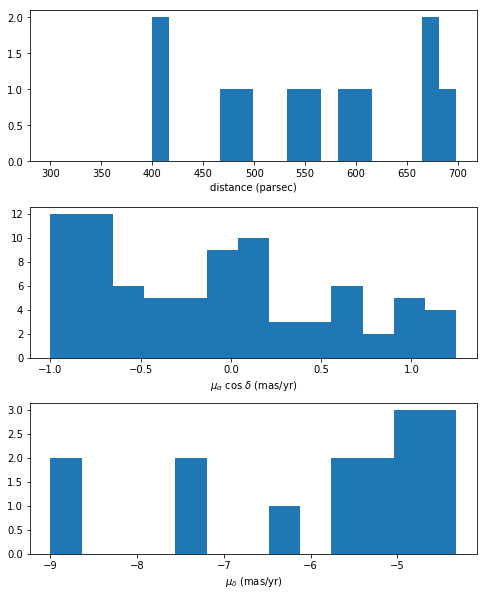

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8,10))

hist,bins, __ = ax1.hist(parcs_cl, bins=np.arange(300, 700, 16.6))
ax2.hist(pmra_new_c_cl, bins=np.arange(-1, 1.3, 0.173))
ax3.hist(pmdec_new_cl, bins=np.arange(-9, -4, 0.36))
ax1.set_xlabel('distance (parsec)')
ax2.set_xlabel('$\mu_\\alpha$ cos $\delta$ (mas/yr)')
ax3.set_xlabel('$\mu_\\delta$ (mas/yr)')
plt.subplots_adjust(hspace=0.3)
plt.show()

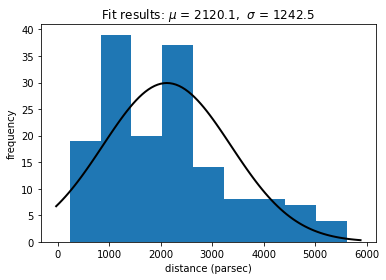

In [44]:
values, bins, _ = plt.hist(parcs_cl, bins='auto')#np.arange(400, 600, 16.6)

mu1, std1 = norm.fit(parcs_cl)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

area = sum(np.diff(bins)*values)

p = norm.pdf(x, mu1, std1)*area
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: $\mu$ = %.1f,  $\sigma$ = %.1f" % (mu1, std1)
plt.title(title)

plt.xlabel('distance (parsec)')
plt.ylabel('frequency')

#plt.savefig('M34_Gaussian_pc.png', dpi=1000)

plt.show()

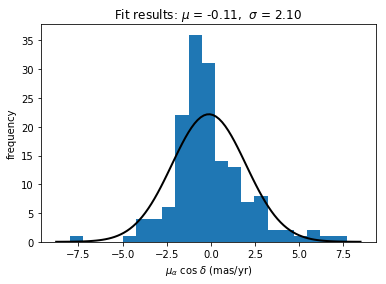

In [45]:
values, bins, _ = plt.hist(pmra_new_c_cl, bins='auto')

mu2, std2 = norm.fit(pmra_new_c_cl)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

area = sum(np.diff(bins)*values)

p = norm.pdf(x, mu2, std2)*area
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: $\mu$ = %.2f,  $\sigma$ = %.2f" % (mu2, std2)
plt.title(title)

plt.xlabel('$\mu_\\alpha$ cos $\delta$ (mas/yr)')
plt.ylabel('frequency')

#plt.savefig('M34_Gaussian_pmra.png', dpi=1000)

plt.show()

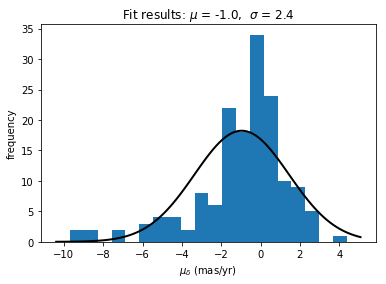

In [46]:
values, bins, _ = plt.hist(pmdec_new_cl, bins='auto')

mu3, std3 = norm.fit(pmdec_new_cl)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

area = sum(np.diff(bins)*values)

p = norm.pdf(x, mu3, std3)*area
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: $\mu$ = %.1f,  $\sigma$ = %.1f" % (mu3, std3)
plt.title(title)

plt.xlabel('$\mu_\\delta$ (mas/yr)')
plt.ylabel('frequency')

#plt.savefig('M34_Gaussian_pmdec.png', dpi=1000)

plt.show()

# Error Analysis

In [47]:
err_ra  = np.asarray([output_all[i][2] for i in range(0, len(output_all))])
err_dec = np.asarray([output_all[i][4] for i in range(0, len(output_all))])
err_pax = np.asarray([output_all[i][6] for i in range(0, len(output_all))])
err_pmra = np.asarray([output_all[i][8] for i in range(0, len(output_all))])
err_pmdec = np.asarray([output_all[i][10] for i in range(0, len(output_all))])

In [48]:
err_ra_new = np.delete(err_ra, [two_para_star]).astype(float)
err_dec_new = np.delete(err_dec, [two_para_star]).astype(float)
err_pax_new = np.delete(err_pax, [two_para_star]).astype(float)
err_pmra_new = np.delete(err_pmra, [two_para_star]).astype(float)
err_pmdec_new = np.delete(err_pmdec, [two_para_star]).astype(float)

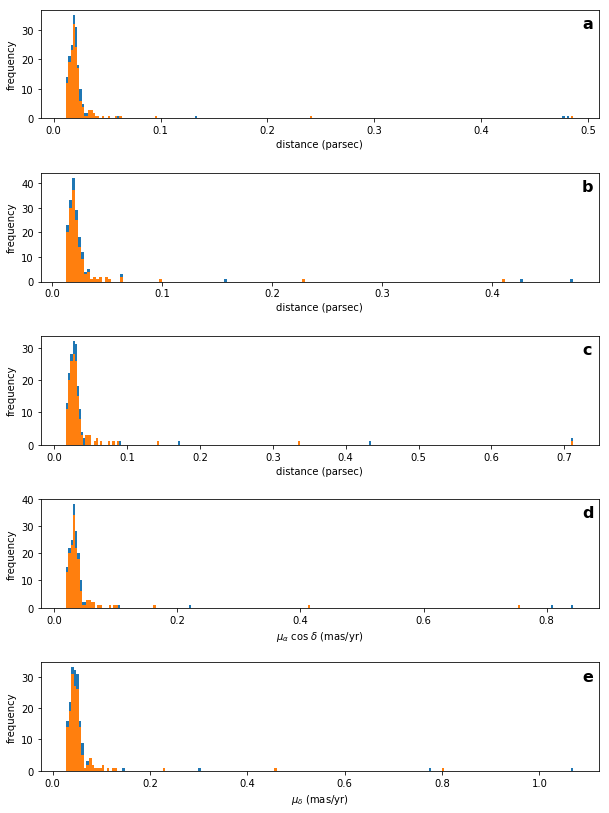

In [49]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10,14))

_,bins,__ = ax1.hist(err_ra_new, bins='auto')
ax1.hist(err_ra_new[mask_cluster], bins)

_,bins,__ = ax2.hist(err_dec_new, bins='auto')
ax2.hist(err_dec_new[mask_cluster], bins)

_,bins,__ = ax3.hist(err_pax_new, bins='auto')
ax3.hist(err_pax_new[mask_cluster], bins)

_,bins,__ = ax4.hist(err_pmra_new, bins='auto')
ax4.hist(err_pmra_new[mask_cluster], bins)

_,bins,__ = ax5.hist(err_pmdec_new, bins='auto')
ax5.hist(err_pmdec_new[mask_cluster], bins)


ax1.set_xlabel('distance (parsec)')
ax2.set_xlabel('distance (parsec)')
ax3.set_xlabel('distance (parsec)')
ax4.set_xlabel('$\mu_\\alpha$ cos $\delta$ (mas/yr)')
ax5.set_xlabel('$\mu_\\delta$ (mas/yr)')

ax1.set_ylabel('frequency')
ax2.set_ylabel('frequency')
ax3.set_ylabel('frequency')
ax4.set_ylabel('frequency')
ax5.set_ylabel('frequency')



posx = 0.97
posy = 0.83

ax1.text(posx, posy, 'a', transform=ax1.transAxes, fontsize=16, fontweight='bold')
ax2.text(posx, posy, 'b', transform=ax2.transAxes, fontsize=16, fontweight='bold')
ax3.text(posx, posy, 'c', transform=ax3.transAxes, fontsize=16, fontweight='bold')
ax4.text(posx, posy, 'd', transform=ax4.transAxes, fontsize=16, fontweight='bold')
ax5.text(posx, posy, 'e', transform=ax5.transAxes, fontsize=16, fontweight='bold')




plt.subplots_adjust(hspace=0.5)

#fig.savefig('M34_histogram.png', dpi=1000)

plt.show()

# Gaia Magnitude

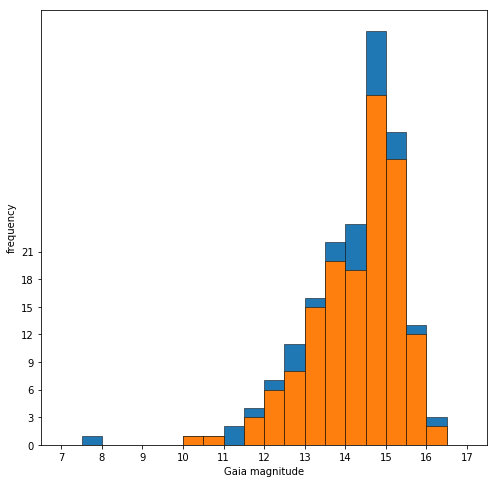

In [50]:
fig, ax1 = plt.subplots(1, 1, figsize=(8,8))

ax1.hist(magg_new, bins=np.arange(7,17.5,0.5), edgecolor='black', linewidth=0.5)
ax1.hist(magg_new[mask_cluster], bins=np.arange(7,17.5,0.5), edgecolor='black', linewidth=0.5, alpha=1)

ax1.set_xticks(np.arange(7,18,1))
ax1.set_yticks(np.arange(0,22,3))

ax1.set_xlabel('Gaia magnitude')
ax1.set_ylabel('frequency')

plt.show()

In [51]:
print( "#INPUT: %.1i" % (len(sid)))
print( "WITH ALL 5 PARAMETERS: %.1i" % (len(sid_new)))
print()
print( "--> NO 5 parameter sols for: %.1i" % (len(sid)-len(sid_new)))
print()
print( "RV exist for: %.1i" % (rv_0.count(0)))
print( "NO RV exist for: %.1i" % (len(sid)-rv_0.count(0)))
print()
print( "--> Fraction: %.3f" % (rv_0.count(0)/len(sid)))
print()

print()
print( "Distance: %.1f +/- %.1f" % (mu1, std1))
print( "PM RA: %.1f +/- %.1f" % (mu2, std2))
print( "PM DEC: %.1f +/- %.1f" % (mu3, std3))
print()

print()


#INPUT: 191
WITH ALL 5 PARAMETERS: 184

--> NO 5 parameter sols for: 7

RV exist for: 158
NO RV exist for: 33

--> Fraction: 0.827


Distance: 2120.1 +/- 1242.5
PM RA: -0.1 +/- 2.1
PM DEC: -1.0 +/- 2.4




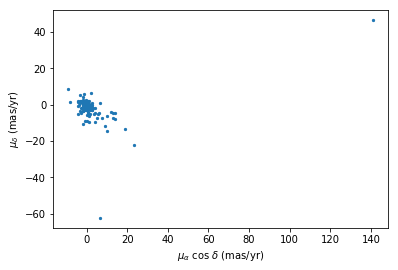

In [52]:
plt.scatter(pmra_new_c, pmdec_new,s=5)

plt.xlabel('$\mu_\\alpha$ cos $\delta$ (mas/yr)')
plt.ylabel('$\mu_\\delta$ (mas/yr)')

plt.show()

In [53]:
def x_both(lst):
    tmp = lst + [-x for x in lst]
    return tmp

#1 SIGMA
def x_ellipse1(a, b):
    xel = np.arange(-a, a, 0.0001)
    xel_pow = xel**2
    dis = a**2-xel_pow 
    yel = b/a * np.sqrt(dis.tolist())
    yel_both = []
    for i in yel:
        yel_both.append(i)
    for i in yel:
        yel_both.append(-i)
    xel_both = x_both(xel.tolist())
    return np.array(xel_both)

def y_ellipse1(a, b):
    xel = np.arange(-a, a, 0.0001)
    xel_pow = xel**2
    dis = a**2-xel_pow 
    yel = b/a * np.sqrt(dis.tolist())
    yel_both = []
    for i in yel:
        yel_both.append(i)
    for i in yel:
        yel_both.append(-i)
    xel_both = x_both(xel.tolist())
    return np.array(yel_both)


#2 SIGMA
def x_ellipse2(a, b):
    a = 2*a
    b = 2*b
    xel = np.arange(-a, a, 0.0001)
    xel_pow = xel**2
    dis = a**2-xel_pow 
    yel = b/a * np.sqrt(dis.tolist())
    yel_both = []
    for i in yel:
        yel_both.append(i)
    for i in yel:
        yel_both.append(-i)
    xel_both = x_both(xel.tolist())
    return np.array(xel_both)

def y_ellipse2(a, b):
    a = 2*a
    b = 2*b
    xel = np.arange(-a, a, 0.0001)
    xel_pow = xel**2
    dis = a**2-xel_pow 
    yel = b/a * np.sqrt(dis.tolist())
    yel_both = []
    for i in yel:
        yel_both.append(i)
    for i in yel:
        yel_both.append(-i)
    xel_both = x_both(xel.tolist())
    return np.array(yel_both)


#3 SIGMA
def x_ellipse3(a, b):
    a = 3*a
    b = 3*b
    xel = np.arange(-a, a, 0.0001)
    xel_pow = xel**2
    dis = a**2-xel_pow 
    yel = b/a * np.sqrt(dis.tolist())
    yel_both = []
    for i in yel:
        yel_both.append(i)
    for i in yel:
        yel_both.append(-i)
    xel_both = x_both(xel.tolist())
    return np.array(xel_both)

def y_ellipse3(a, b):
    a = 3*a
    b = 3*b
    xel = np.arange(-a, a, 0.0001)
    xel_pow = xel**2
    dis = a**2-xel_pow 
    yel = b/a * np.sqrt(dis.tolist())
    yel_both = []
    for i in yel:
        yel_both.append(i)
    for i in yel:
        yel_both.append(-i)
    xel_both = x_both(xel.tolist())
    return np.array(yel_both)

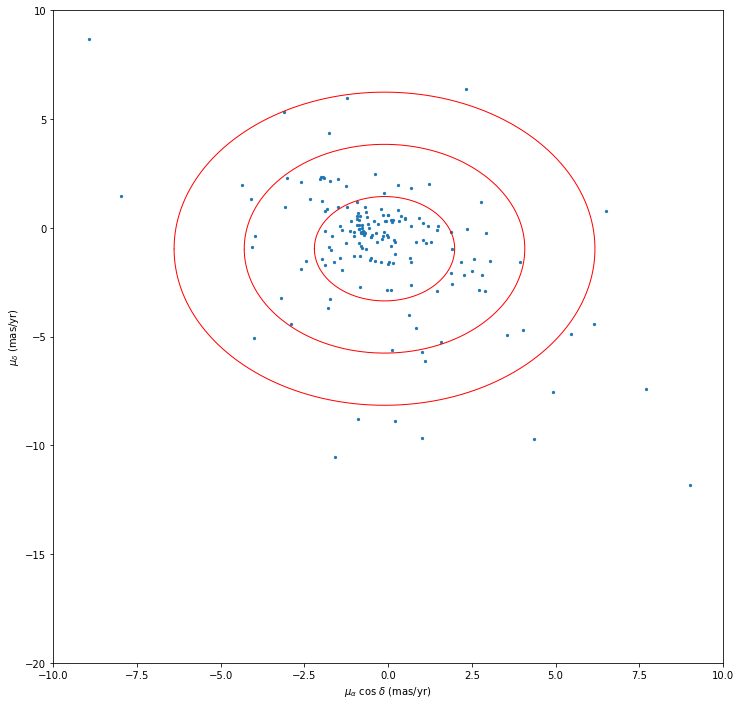

In [54]:
plt.subplots(1,1,figsize=(12,12))

plt.scatter(pmra_new_c, pmdec_new,s=5)

x_el1 = x_ellipse1(std2,std3)+mu2
y_el1 = y_ellipse1(std2,std3)+mu3
x_el2 = x_ellipse2(std2,std3)+mu2
y_el2 = y_ellipse2(std2,std3)+mu3
x_el3 = x_ellipse3(std2,std3)+mu2
y_el3 = y_ellipse3(std2,std3)+mu3

plt.plot(x_el1, y_el1, c='r', linewidth=1)
plt.plot(x_el2, y_el2, c='r', linewidth=1)
plt.plot(x_el3, y_el3, c='r', linewidth=1)

plt.xlabel('$\mu_\\alpha$ cos $\delta$ (mas/yr)')
plt.ylabel('$\mu_\\delta$ (mas/yr)')

plt.xlim(-10,10)
plt.ylim(-20,10)

#plt.xscale("symlog")
#plt.yscale("symlog")

plt.show()